<a href="https://colab.research.google.com/github/Hemant051/Machine-Learning/blob/main/MBASalarypredictionusingSLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
salaryPrediction= pd.read_csv("/content/SalaryPred.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
X=sm.add_constant(salaryPrediction['Per'])
Y= salaryPrediction['Salary']

In [ ]:
salaryPrediction
X

,const,Per
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00
5,1.0,55.00
6,1.0,70.00
7,1.0,68.00
8,1.0,82.00
9,1.0,59.00


In [ ]:
train_X, test_X, train_Y,test_Y=train_test_split(X,Y,train_size=0.8)

In [ ]:
model=sm.OLS(train_Y,train_X).fit()

In [ ]:
print(model.params)

const    197756.963868
Per         975.409440
dtype: float64


In [ ]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     -0.004    
Dependent Variable: Salary           AIC:                933.7964  
Date:               2021-08-30 08:28 BIC:                937.0182  
No. Observations:   37               Log-Likelihood:     -464.90   
Df Model:           1                F-statistic:        0.8695    
Df Residuals:       35               Prob (F-statistic): 0.357     
R-squared:          0.024            Scale:              5.0736e+09
-------------------------------------------------------------------
           Coef.     Std.Err.    t    P>|t|    [0.025      0.975]  
-------------------------------------------------------------------
const   197756.9639 68187.4956 2.9002 0.0064 59328.9885 336184.9392
Per        975.4094  1046.0582 0.9325 0.3575 -1148.2017   3099.0206
-------------------------------------------------------------------
Omnibus:                3.413        Durbin-Watson:           1.598
Prob(Omnibus):          0.182        Jarque-Bera (JB):        2.261
Skew:                   0.570        Prob(JB):                0.323
Kurtosis:               3.407        Condition No.:           380  
===================================================================

"""

In [ ]:
salary_resid=model.resid

In [ ]:
probplot=sm.ProbPlot(salary_resid)

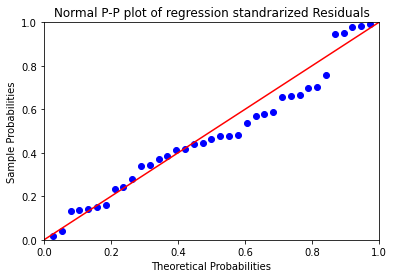

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
#plt.figure(figsize(8,6))
probplot.ppplot(line='45')
plt.title("Normal P-P plot of regression standrarized Residuals")
plt.show()

In [ ]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

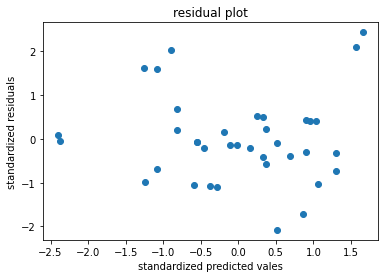

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(salary_resid))
plt.title("residual plot");
plt.xlabel("standardized predicted vales");
plt.ylabel("standardized residuals");

In [ ]:
from scipy.stats import zscore
salaryPrediction['z_score_salary']=zscore(salaryPrediction.Salary)

In [ ]:
salaryPrediction[(salaryPrediction.z_score_salary>3.0)|(salaryPrediction.z_score_salary<-3.0)]

,S. No.,Per,Salary,z_score_salary


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


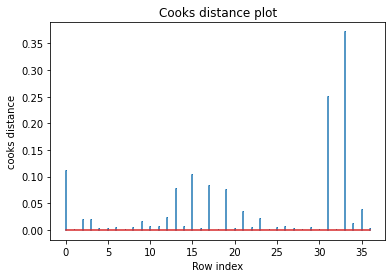

In [ ]:
import numpy as np
mba_influence= model.get_influence()
(c,p)=mba_influence.cooks_distance
plt.stem(np.arange(len(train_X)),np.round(c,3),markerfmt=",");
plt.title("Cooks distance plot" );
plt.xlabel("Row index")
plt.ylabel("cooks distance");

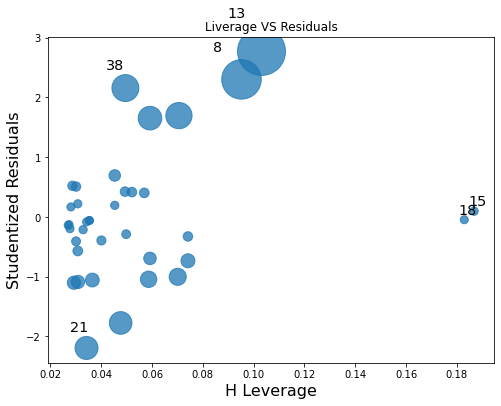

In [ ]:
#livearge value

from statsmodels.graphics.regressionplots import influence_plot
fig, ax= plt.subplots(figsize=(8,6))
influence_plot(model,ax=ax)
plt.title("Liverage VS Residuals")
plt.show();

In [ ]:
pred_Y=model.predict(test_X)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
np.abs(r2_score(test_Y,pred_Y))

0.13309717538913468

In [ ]:
np.sqrt(mean_squared_error(test_Y,pred_Y))

56273.44541604666